# Basic Cross-Validation Experiment on the ExtraSensory data set

## Set up the Notebook

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

In [2]:
import importlib, sys, os
sys.path.insert(0, os.path.abspath('..'))
if(importlib.util.find_spec("mFlow") is None):
    !git clone https://github.com/mlds-lab/mFlow.git
    !pip install ./mFlow
else:
    print("mFlow module found")

mFlow module found


## Import modules

In [3]:
from mFlow.Blocks.data_loader_extrasensory import extrasensory_data_loader
from mFlow.Blocks.filter import MisingLabelFilter,  MisingDataColumnFilter, Take
from mFlow.Blocks.imputer import Imputer
from mFlow.Blocks.normalizer import Normalizer
from mFlow.Blocks.experimental_protocol import ExpTrainTest, ExpCV, ExpWithin
from mFlow.Blocks.results_analysis import ResultsConcat, ResultsCVSummarize, DataYieldReport
from mFlow.Workflow.workflow import workflow

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.linear_model import LogisticRegression

## Define the workflow

This workflow performs a 5-fold cross-validation experiment on the ExtraSensory data set sleeping prediction task. The model used is logistic regression with a fixed regularization hyper-parameter. 

The workflow includes a column filter that screens out feature dimensions that are less than 20% observed, and a missing label filter that removes instances without labels. Next, the workflow performs mean imputation followed by feature normalization. Lastly, the cross-validation experiment is run on the pre-processed data set and results are evaluated using four metrics (accuracy, F1, precision and recall). The results from each fold are combined and then summarized.

The workflow computation graph is then created and displayed, and the results are then displayed. 

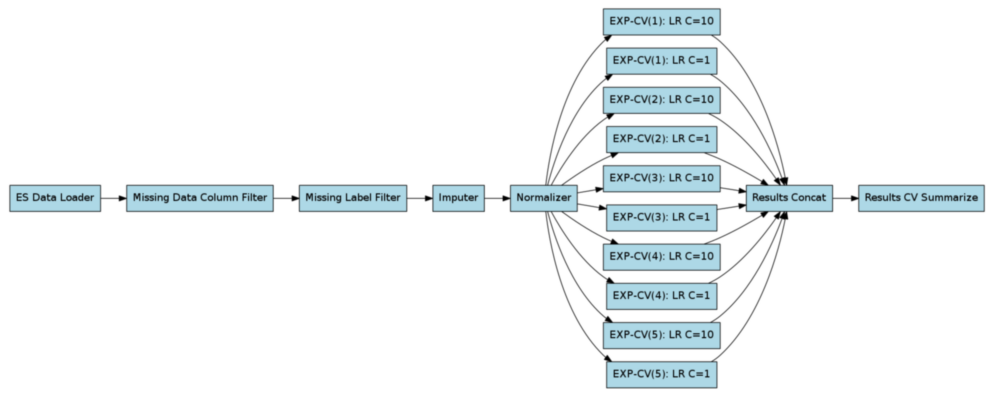

In [4]:
estimators = {"LR C=10": LogisticRegression(solver="lbfgs",max_iter=100, C=1),
              "LR C=1": LogisticRegression(solver="lbfgs",max_iter=100, C=0.1)}

metrics   = [accuracy_score, f1_score, precision_score, recall_score]
df_raw    = extrasensory_data_loader(label="SLEEPING");
df_cf     = MisingDataColumnFilter(df_raw);
df_lf     = MisingLabelFilter(df_cf);
df_imp    = Imputer(df_lf)
df_norm   = Normalizer(df_imp);
res_cv    = ExpCV(df_norm, estimators, metrics=metrics);
res_cat   = ResultsConcat(res_cv)
summary   = ResultsCVSummarize(res_cat)

flow = workflow({"summary":summary}); 
flow.output=flow.run(backend="sequential", monitor=True, from_scratch=True);

In [5]:
flow.output['summary']['report']

accuracy_score            f1_score           precision_score  \
                  mean       sem      mean       sem            mean   
Method                                                                 
LR C=1        0.889087  0.009637  0.806295  0.016127        0.816313   
LR C=10       0.891767  0.007890  0.811048  0.014910        0.818339   

                  recall_score            
              sem         mean       sem  
Method                                    
LR C=1   0.023440     0.801126  0.029807  
LR C=10  0.023624     0.807109  0.023573